In [94]:
# pip install mysql-connector-python


In [95]:
import mysql.connector

# Remplacez les valeurs suivantes par les informations de connexion à votre serveur MySQL
host = "localhost" # L'hôte du serveur MySQL
user = "root"  # Votre nom d'utilisateur MySQL
password = "root"  # Votre mot de passe MySQL
database_name = "courses"  # Le nom de la nouvelle base de données

# Créez une connexion au serveur MySQL
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password
)

# Créez un curseur pour exécuter des requêtes SQL
cursor = conn.cursor()

# Exécutez une requête SQL pour obtenir la liste des bases de données
cursor.execute("SHOW DATABASES")

# Récupérez les résultats de la requête
databases = cursor.fetchall()

# Vérifiez si la base de données que vous recherchez existe
if (database_name,) in databases:
    print(f"La base de données '{database_name}' existe et va être supprimée puis recréée.")
    database_drop = f'''DROP DATABASE {database_name} '''
    cursor.execute(database_drop)
    # Utilisez le curseur pour exécuter une commande SQL de création de base de données
    create_database_query = f"CREATE DATABASE {database_name}"
    cursor.execute(create_database_query)
    print(f"La base de données '{database_name}' a été recréée avec succès.")
    
else:
    print(f"La base de données '{database_name}' n'existe pas.")
     # Utilisez le curseur pour exécuter une commande SQL de création de base de données
    create_database_query = f"CREATE DATABASE {database_name}"
    cursor.execute(create_database_query)
    print(f"La base de données '{database_name}' a été créée avec succès.")

# Fermez le curseur et la connexion
cursor.close()
conn.close()

La base de données 'courses' existe et va être supprimée puis recréée.
La base de données 'courses' a été recréée avec succès.


In [96]:
# Créez une connexion à la base de données
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database_name
)

# Créez un curseur pour exécuter des requêtes SQL
cursor = conn.cursor()

# Exécutez une requête SQL pour obtenir la liste des bases de données
cursor.execute("SHOW TABLES")

# Récupérez les résultats de la requête
tables = cursor.fetchall()

if ("famille_article",) in tables:
    print(f"La table 'famille_article' existe.")
else:
    print(f"La table 'famille_article' n'existe pas.")
    # Définissez la commande SQL pour créer une table
    create_table_famille_article = """
    CREATE TABLE famille_article (
        id INT AUTO_INCREMENT PRIMARY KEY,
        famille_produit VARCHAR(255) UNIQUE
    )
    """
    # Exécutez la commande SQL pour créer la table
    cursor.execute(create_table_famille_article)

    print(f"La table 'famille_article' a été créée avec succès.")

if ("conditions",) in tables:
    print(f"La table 'conditions' existe.")
else:
    print(f"La table 'conditions' n'existe pas.")
    # Définissez la commande SQL pour créer une table
    create_table_condition = """
    CREATE TABLE conditions (
        id INT AUTO_INCREMENT PRIMARY KEY,
        contenant_produit VARCHAR(255) UNIQUE
    )
    """
    # Exécutez la commande SQL pour créer la table
    cursor.execute(create_table_condition)

    print(f"La table 'conditions' a été créée avec succès.")

# Vérifiez si la base de données que vous recherchez existe
if ("produit",) in tables:
    print(f"La table 'produit' existe.")
else:
    print(f"La table 'produit' n'existe pas.")
    # Définissez la commande SQL pour créer une table
    create_table_produit = """
    CREATE TABLE produit (
        id INT AUTO_INCREMENT PRIMARY KEY,
        code_article INT,
        libelle_article VARCHAR(255),
        famille_article_id INT,
        condition_id INT,
        pu_ht DOUBLE,
        FOREIGN KEY (famille_article_id) REFERENCES famille_article (id),
        FOREIGN KEY (condition_id) REFERENCES conditions (id)  
    )
    """
    # Exécutez la commande SQL pour créer la table
    cursor.execute(create_table_produit)

    print(f"La table 'produit' a été créée avec succès.")

    # Validez la création de la table
    conn.commit()

# Fermez le curseur et la connexion
cursor.close()
conn.close()

La table 'famille_article' n'existe pas.
La table 'famille_article' a été créée avec succès.
La table 'conditions' n'existe pas.
La table 'conditions' a été créée avec succès.
La table 'produit' n'existe pas.
La table 'produit' a été créée avec succès.


In [97]:
import csv

In [98]:
# Chemin vers le fichier CSV
csv_file_path = "Produits - Feuille 1.csv"

# Établir une connexion à la base de données
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database_name
)

# Créer un curseur pour exécuter des requêtes SQL
cursor = conn.cursor(buffered=True)

# Lecture du fichier CSV et insertion des données dans la table
with open(csv_file_path, "r", newline="") as csv_file:
    csv_reader = csv.reader(csv_file)
    en_tetes = next(csv_reader)  # Enregistrer et ignorer la première ligne si elle contient les en-têtes
    csv_reader = list(csv_reader)

for row in csv_reader:

    # Insérer les données dans la table MySQL
    insert_conditions = "INSERT IGNORE INTO courses.conditions (contenant_produit) VALUES (%s)"
    # Remplacez "nom_de_la_table" et les colonnes par les valeurs appropriées

    # Exécution de la requête d'insertion
    cursor.execute(insert_conditions, (row[3],))

    # Insérer les données dans la table MySQL
    insert_famille_article = "INSERT IGNORE INTO courses.famille_article (famille_produit) VALUES (%s)"
    # Remplacez "nom_de_la_table" et les colonnes par les valeurs appropriées

    # Exécution de la requête d'insertion
    cursor.execute(insert_famille_article, (row[2],))

    select_id_condition = f"SELECT id FROM conditions WHERE contenant_produit = %s"

    cursor.execute(select_id_condition, (row[3],))

    # Parcours le curseur qui contient un seul élément
    conditions_id = cursor.fetchone()[0] 

    # Vide le curseur
    cursor.fetchone() 

    select_id_famille_article = f"SELECT id FROM famille_article WHERE famille_produit = %s"

    cursor.execute(select_id_famille_article, (row[2],))

    famille_article_id = cursor.fetchone()[0]

    cursor.fetchone()
    
    # Insérer les données dans la table MySQL
    insert_produit = "INSERT INTO courses.produit (code_article, libelle_article, famille_article_id, condition_id, pu_ht) VALUES (%s, %s, %s, %s, %s)"
    # Remplacez "nom_de_la_table" et les colonnes par les valeurs appropriées

    # Exécution de la requête d'insertion
    cursor.execute(insert_produit, (row[0],row[1],famille_article_id,conditions_id,row[4]))

# Valider les modifications dans la base de données
conn.commit()

# Fermer le curseur et la connexion
cursor.close()
conn.close()

print("Les données du fichier CSV ont été insérées avec succès dans la base de données.")


Les données du fichier CSV ont été insérées avec succès dans la base de données.


In [99]:
import pandas as pd

In [100]:
# Établir une connexion à la base de données
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database_name
)

# Créer un curseur pour exécuter des requêtes SQL
cursor = conn.cursor(buffered=True)

select_produit = "SELECT * FROM produit"
cursor.execute(select_produit)
produit = cursor.fetchall()
produit = pd.DataFrame(produit)

select_condition = "SELECT * FROM conditions"
cursor.execute(select_condition)
conditions = cursor.fetchall()
conditions = pd.DataFrame(conditions)

select_famille_article = "SELECT * FROM famille_article"
cursor.execute(select_famille_article)
famille_article = cursor.fetchall()
famille_article = pd.DataFrame(famille_article)

conn.commit()

# Fermer le curseur et la connexion
cursor.close()
conn.close()

print("Les tables produit, conditions et famille_article ont été lues avec succès")

In [101]:
produit

,0,1,2,3,4,5
0,1,1010,HUILE ARACHIDE 25 L,1,1,60.71
1,2,1011,HUILE ARACHIDE 5 L,1,1,14.33
2,3,1012,HUILE ARACHIDE 1 L,1,3,2.87
3,4,1014,HUILE MEZZO 1 L (50%OLIVE50%TOURNESOL),1,3,2.67
4,5,1015,HUILE COLZA 5 L,1,1,7.57
...,...,...,...,...,...,...
1858,1859,35885,QUICHES LORRAINE 180G X14,1665,28,17.50
1859,1860,35900,FARCIS NICOIS SG - SAC 2KG,1665,28,51.52
1860,1861,35920,RAVIOLIS A LA NICOISE SG 2KG,1665,34,40.90
1861,1862,37718,COOKIES CHOCOLAT SG 76G X30,1665,28,29.65


In [102]:
produit = produit.drop(0, axis=1)
produit

,1,2,3,4,5
0,1010,HUILE ARACHIDE 25 L,1,1,60.71
1,1011,HUILE ARACHIDE 5 L,1,1,14.33
2,1012,HUILE ARACHIDE 1 L,1,3,2.87
3,1014,HUILE MEZZO 1 L (50%OLIVE50%TOURNESOL),1,3,2.67
4,1015,HUILE COLZA 5 L,1,1,7.57
...,...,...,...,...,...
1858,35885,QUICHES LORRAINE 180G X14,1665,28,17.50
1859,35900,FARCIS NICOIS SG - SAC 2KG,1665,28,51.52
1860,35920,RAVIOLIS A LA NICOISE SG 2KG,1665,34,40.90
1861,37718,COOKIES CHOCOLAT SG 76G X30,1665,28,29.65


In [103]:
produit.columns = en_tetes
produit

,Code article,LIBELLE ARTICLE,FAMILLE ARTICLE,CONDITION,PU HT
0,1010,HUILE ARACHIDE 25 L,1,1,60.71
1,1011,HUILE ARACHIDE 5 L,1,1,14.33
2,1012,HUILE ARACHIDE 1 L,1,3,2.87
3,1014,HUILE MEZZO 1 L (50%OLIVE50%TOURNESOL),1,3,2.67
4,1015,HUILE COLZA 5 L,1,1,7.57
...,...,...,...,...,...
1858,35885,QUICHES LORRAINE 180G X14,1665,28,17.50
1859,35900,FARCIS NICOIS SG - SAC 2KG,1665,28,51.52
1860,35920,RAVIOLIS A LA NICOISE SG 2KG,1665,34,40.90
1861,37718,COOKIES CHOCOLAT SG 76G X30,1665,28,29.65


In [104]:
produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code article     1863 non-null   int64  
 1   LIBELLE ARTICLE  1863 non-null   object 
 2   FAMILLE ARTICLE  1863 non-null   int64  
 3   CONDITION        1863 non-null   int64  
 4   PU HT            1863 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 72.9+ KB


In [105]:
conditions.columns = ["id", "contenant_produit"]
conditions

,id,contenant_produit
0,145,BAC
1,48,BARQU
2,1436,BIB
3,1,BIDON
4,373,BOCAL
5,57,BOITE
6,3,BOUTE
7,162,BRICK
8,548,BRK
9,89,CAISS


In [106]:
famille_article.columns = ["id", "famille_produit"]
famille_article

,id,famille_produit
0,1441,ALCOOLS CHAMPAGNE MOUSSEUX VINS
1,201,BEURRE ET MARGARINE
2,1077,BISCOTTES ET DERIVES BISCUITS
3,1297,BOISSONS DIVERSES
4,1280,CAFE THE CHOCOLAT
5,217,CHARCUTERIE
6,1030,CONFISERIE
7,730,CONFITURE - MIEL
8,667,CONSERVES DE FRUITS
9,526,CONSERVES LEGUMES ET PLATS PREPARES


In [107]:
import matplotlib.pyplot as plt

(array([192., 289.,  29., 156., 183., 153., 277., 161.,  77., 346.]),
 array([1.0000e+00, 1.6740e+02, 3.3380e+02, 5.0020e+02, 6.6660e+02,
        8.3300e+02, 9.9940e+02, 1.1658e+03, 1.3322e+03, 1.4986e+03,
        1.6650e+03]),
 <BarContainer object of 10 artists>)

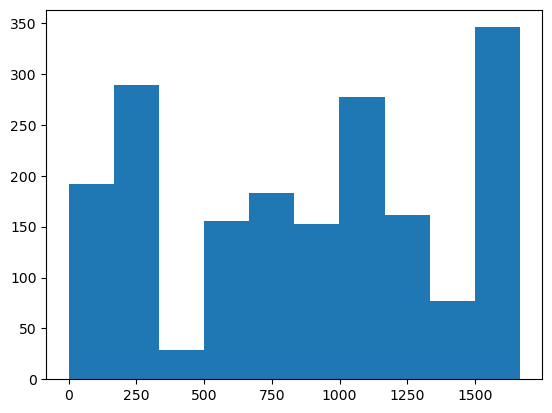

In [108]:
plt.hist(produit["FAMILLE ARTICLE"])

In [109]:
# Établir une connexion à la base de données
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database_name
)

# Créer un curseur pour exécuter des requêtes SQL
cursor = conn.cursor(buffered=True)

select_famille_produit = '''SELECT famille_produit FROM famille_article
right join produit ON
famille_article.id = famille_article_id
'''
cursor.execute(select_famille_produit)
famille_produit = cursor.fetchall()
famille_produit = pd.DataFrame(famille_produit)

select_contenant_produit = '''SELECT contenant_produit FROM conditions
right join produit ON
conditions.id = condition_id
'''
cursor.execute(select_contenant_produit)
contenant_produit = cursor.fetchall()
contenant_produit = pd.DataFrame(contenant_produit)

conn.commit()

# Fermer le curseur et la connexion
cursor.close()
conn.close()

In [110]:
contenant_produit.columns = ['conteneur']


In [111]:
contenant = pd.DataFrame(contenant_produit["conteneur"].value_counts())
contenant

,conteneur
BOITE,395
CARTO,188
SACHE,162
SAC,131
BOUTE,112
PAQUE,110
KG,99
POT,79
FARDE,71
SEAU,57


In [112]:
contenant.columns = ["nombre"]
contenant

,nombre
BOITE,395
CARTO,188
SACHE,162
SAC,131
BOUTE,112
PAQUE,110
KG,99
POT,79
FARDE,71
SEAU,57


In [113]:
famille_produit.groupby([0])[[0]].sum()

,0
0,
ALCOOLS CHAMPAGNE MOUSSEUX VINS,ALCOOLS CHAMPAGNE MOUSSEUX VINSALCOOLS CHAMPAG...
BEURRE ET MARGARINE,BEURRE ET MARGARINEBEURRE ET MARGARINEBEURRE E...
BISCOTTES ET DERIVES BISCUITS,BISCOTTES ET DERIVES BISCUITSBISCOTTES ET DERI...
BOISSONS DIVERSES,BOISSONS DIVERSESBOISSONS DIVERSESBOISSONS DIV...
CAFE THE CHOCOLAT,CAFE THE CHOCOLATCAFE THE CHOCOLATCAFE THE CHO...
CHARCUTERIE,CHARCUTERIECHARCUTERIECHARCUTERIECHARCUTERIECH...
CONFISERIE,CONFISERIECONFISERIECONFISERIECONFISERIECONFIS...
CONFITURE - MIEL,CONFITURE - MIELCONFITURE - MIELCONFITURE - MI...
CONSERVES DE FRUITS,CONSERVES DE FRUITSCONSERVES DE FRUITSCONSERVE...


In [114]:
produit = pd.DataFrame(famille_produit[0].value_counts())
produit.columns = ["nombre"]
produit

,nombre
SURGELES,199
SAUCES ET CONDIMENTS,180
JETABLE,147
BOISSONS DIVERSES,144
CONSERVES LEGUMES ET PLATS PREPARES,141
FROMAGES,128
EPICES ET AROMATES,126
PATES ET AUTRES FECULENTS,102
PRODUITS DE PATISSERIE,83
BISCOTTES ET DERIVES BISCUITS,77


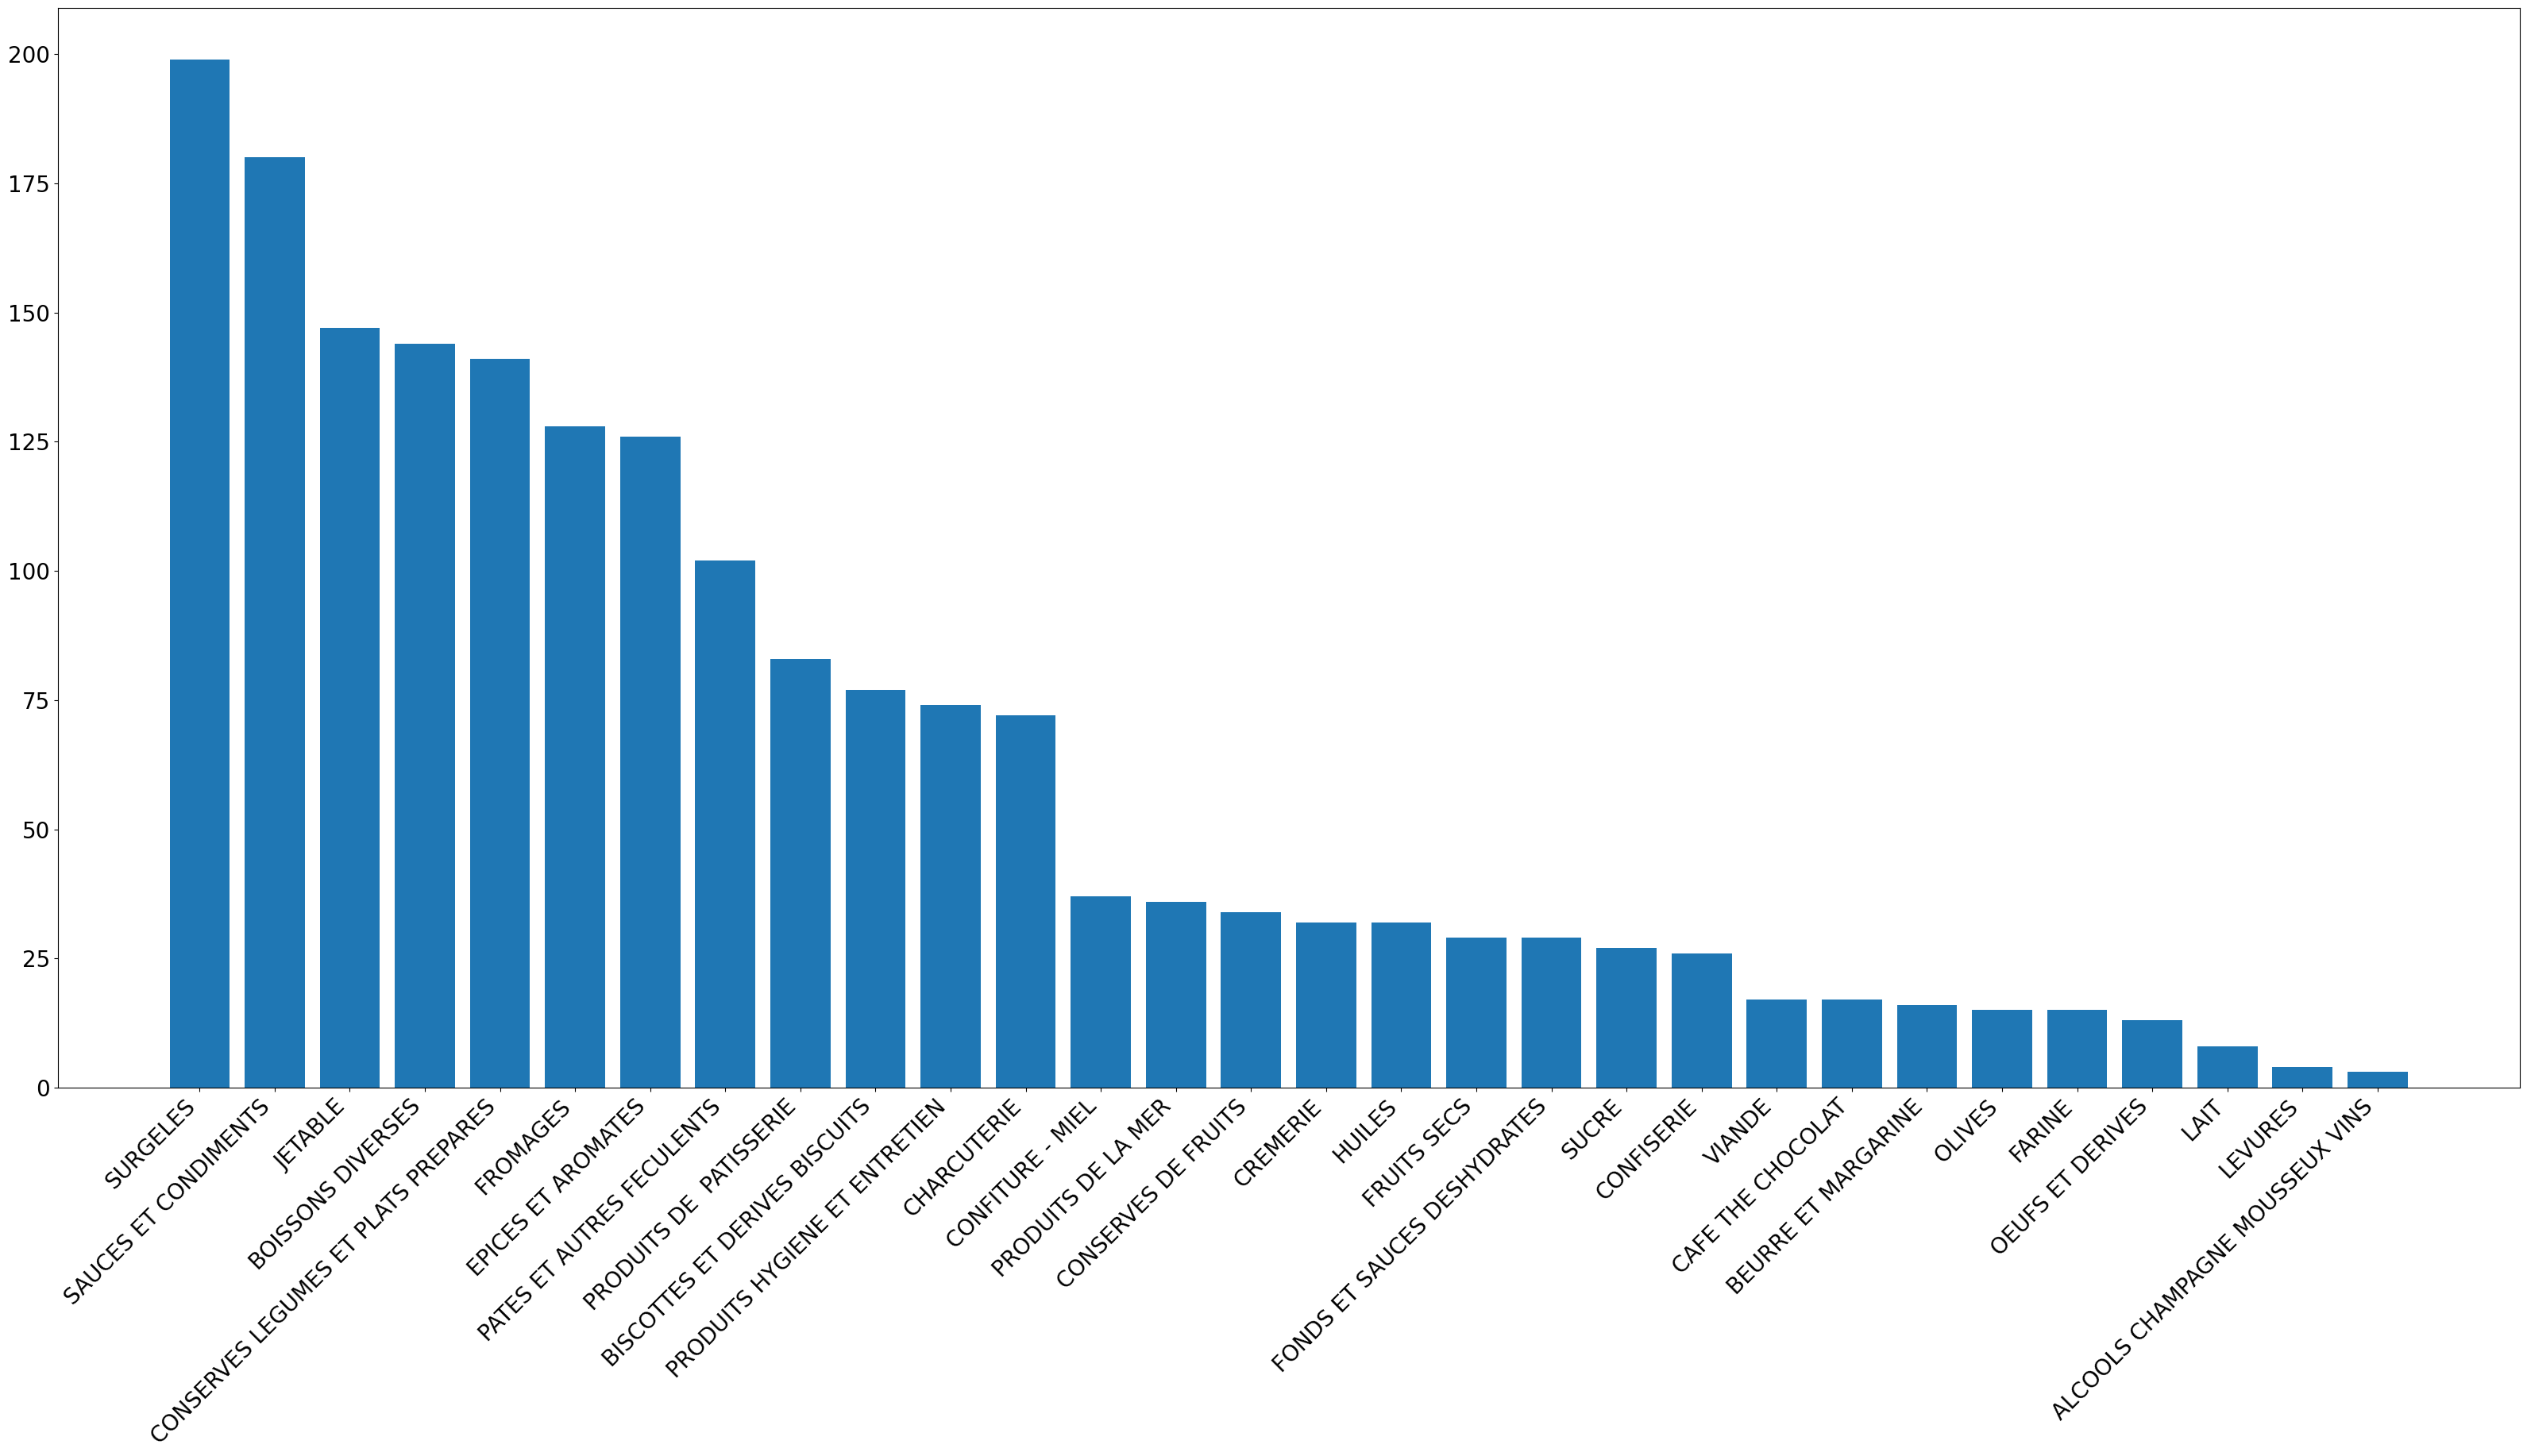

In [115]:
fig, ax = plt.subplots(figsize=(40,20))
ax.bar(produit.index, produit.nombre)
fig.autofmt_xdate(rotation=45)
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)

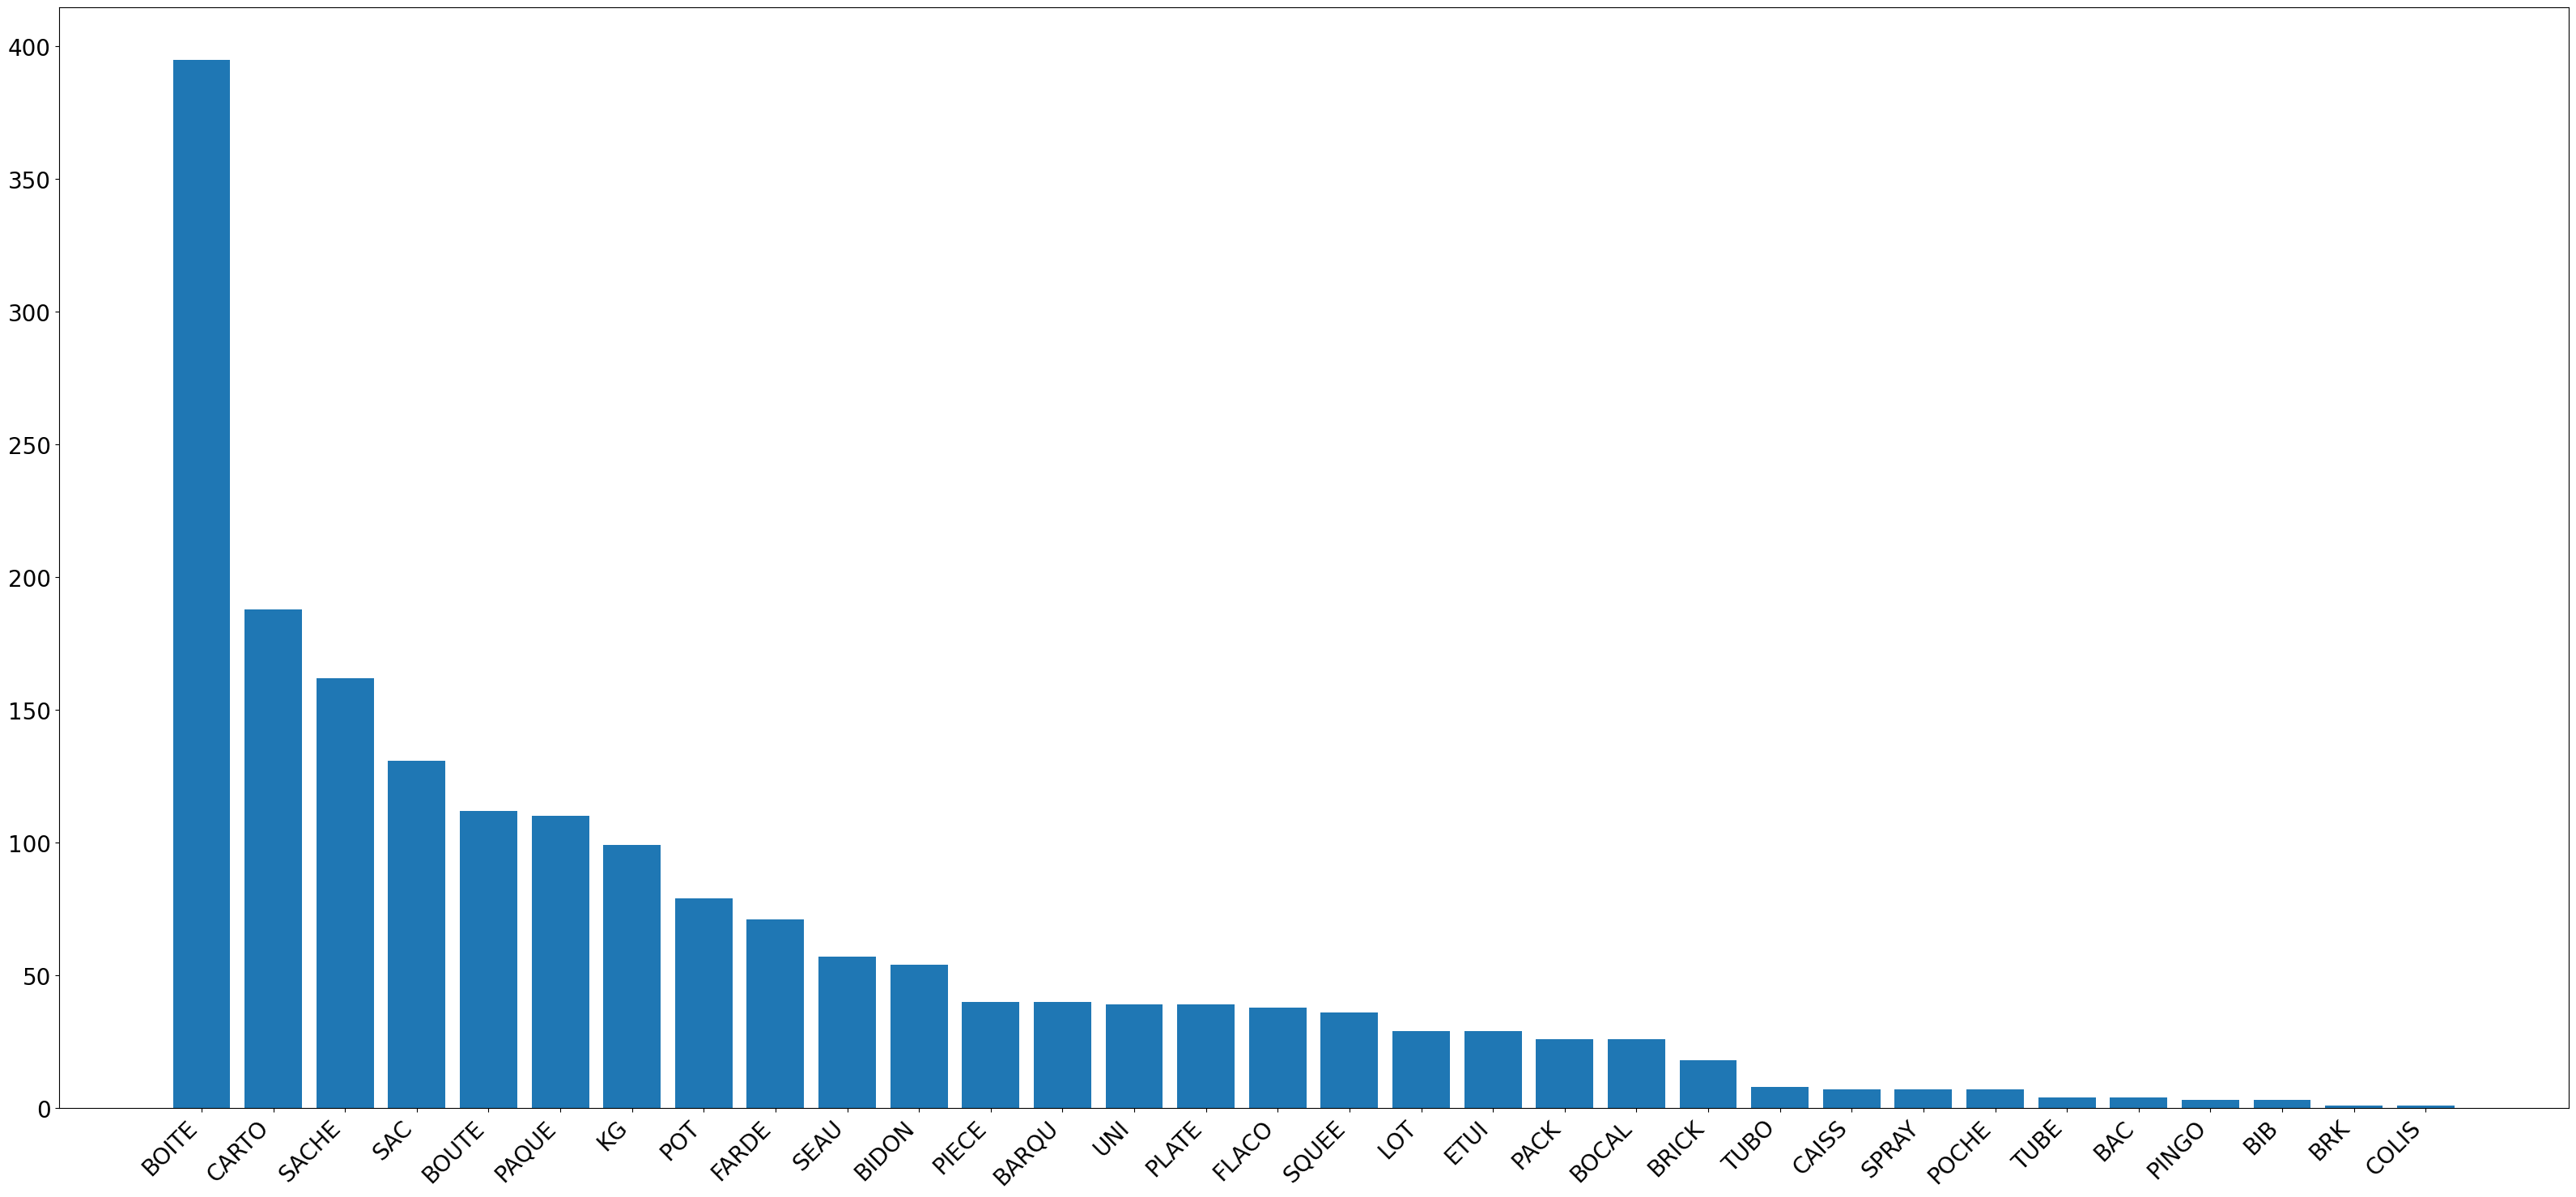

In [116]:
fig, ax = plt.subplots(figsize=(40,20))
ax.bar(x=contenant.index, height=contenant.nombre)
fig.autofmt_xdate(rotation=45)
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)

In [117]:
# Établir une connexion à la base de données
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database_name
)

# Créer un curseur pour exécuter des requêtes SQL
cursor = conn.cursor(buffered=True)

modifie_famille_article = '''ALTER TABLE famille_article
RENAME COLUMN famille_produit to nature_du_produit;
'''
cursor.execute(modifie_famille_article)

conn.commit()

# Fermer le curseur et la connexion
cursor.close()
conn.close()

In [118]:
# Établir une connexion à la base de données
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database_name
)

# Créer un curseur pour exécuter des requêtes SQL
cursor = conn.cursor(buffered=True)

modifie_conditions_contenant = '''UPDATE conditions
SET contenant_produit = 'TONNEAUX'
WHERE contenant_produit = 'BIDON';
'''
cursor.execute(modifie_conditions_contenant)

conn.commit()

# Fermer le curseur et la connexion
cursor.close()
conn.close()

In [119]:
import pandas as pd

In [120]:
""" produit = pd.read_csv("Produits - Feuille 1.csv")
produit """

' produit = pd.read_csv("Produits - Feuille 1.csv")\nproduit '

In [121]:
""" produit.info() """

' produit.info() '

In [122]:
""" produit["PU HT"] = produit["PU HT"].str.replace(",",".")
produit["PU HT"] """

' produit["PU HT"] = produit["PU HT"].str.replace(",",".")\nproduit["PU HT"] '

In [123]:
""" produit["PU HT"] = produit["PU HT"].astype("double") """

' produit["PU HT"] = produit["PU HT"].astype("double") '

In [124]:
""" produit.to_csv("Produits - Feuille 1.csv", index=False) """

' produit.to_csv("Produits - Feuille 1.csv", index=False) '